#### Objective:- The aim of this project is to build a predictive model and find out the sales of each product at a particular store.

In [50]:
# Importing Libraries and important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import *
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [51]:
#Importing Data
Train_data=pd.read_csv("D:\Technocolabs\Mini-project-01 June 2023\Train.csv")
Test_data=pd.read_csv("D:\Technocolabs\Mini-project-01 June 2023\Test.csv")
Train_data1=Train_data
Test_data1=Test_data

#### Checking for Null values in our data

In [52]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [53]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [54]:
Train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [55]:
Test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


#### Outlet_size is catagorical so we will use Mode imputation.

In [56]:
Train_data['Outlet_Size'].value_counts()
Test_data['Outlet_Size'].value_counts()
Train_data['Outlet_Size'].fillna(Train_data['Outlet_Size'].mode()[0],inplace=True)
Test_data['Outlet_Size'].fillna(Test_data['Outlet_Size'].mode()[0],inplace=True)

#### Analyzing diferent attributes in data

In [57]:
Train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Building Box Plot to determine outliers

Text(0.5, 1.0, 'Item Weight Boxplot')

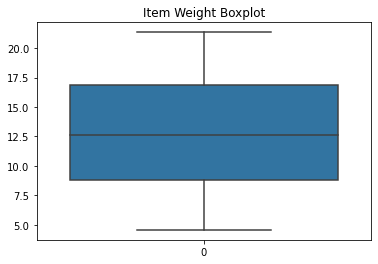

In [58]:
sns.boxplot(data=Train_data["Item_Weight"])
plt.title("Item Weight Boxplot")

Text(0.5, 1.0, 'Item MRP Boxplot')

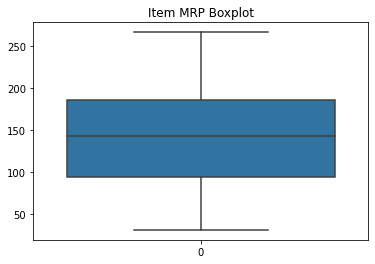

In [59]:
sns.boxplot(data=Train_data["Item_MRP"])
plt.title("Item MRP Boxplot")

#### Ploting count plot for visualizng count of Item Types

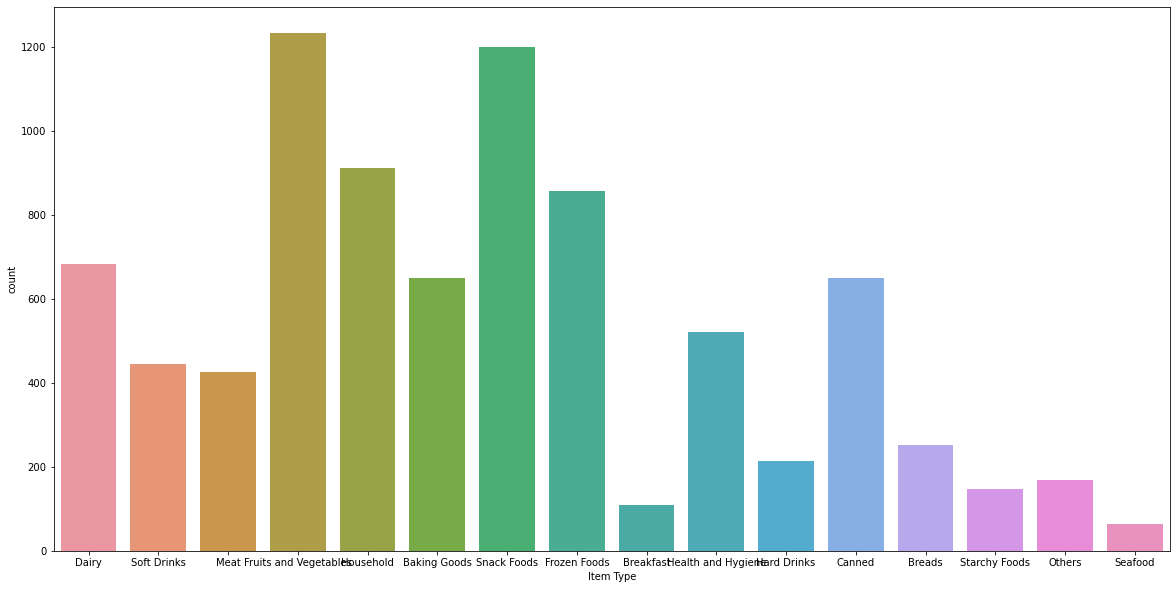

In [60]:
plt.figure(figsize=(20,10))
sns.countplot(x="Item_Type",data=Train_data)
plt.xlabel("Item Type")
plt.show()

#### Selecting features based on our requirements

In [61]:
Train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
Test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

#### Encoding the columns Item_Fat_Content, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Identifier to run model and impute values in Item_weight Column

In [62]:
label_encoder = LabelEncoder()
categorical_cols = ['Item_Fat_Content',"Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
for col in categorical_cols:
    Train_data[col] = label_encoder.fit_transform(Train_data[col])
    Test_data[col] = label_encoder.fit_transform(Test_data[col])

In [63]:
Train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,Dairy,249.8092,4,1,0,1,3735.1380
1,5.920,2,0.019278,Soft Drinks,48.2692,8,1,2,2,443.4228
2,17.500,1,0.016760,Meat,141.6180,4,1,0,1,2097.2700
3,19.200,2,0.000000,Fruits and Vegetables,182.0950,3,1,2,0,732.3800
4,8.930,1,0.000000,Household,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,Snack Foods,214.5218,1,0,2,1,2778.3834
8519,8.380,2,0.046982,Baking Goods,108.1570,5,1,1,1,549.2850
8520,10.600,1,0.035186,Health and Hygiene,85.1224,6,2,1,1,1193.1136
8521,7.210,2,0.145221,Snack Foods,103.1332,8,1,2,2,1845.5976


In [64]:
Test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,Snack Foods,107.8622,4,1,0,1
1,8.300,4,0.038428,Dairy,87.3198,7,1,1,1
2,14.600,1,0.099575,Others,241.7538,3,1,2,0
3,7.315,1,0.015388,Snack Foods,155.0340,7,1,1,1
4,NaN,2,0.118599,Dairy,234.2300,0,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,Snack Foods,141.3154,2,2,0,1
5677,7.600,2,0.142991,Starchy Foods,169.1448,8,1,2,2
5678,10.000,1,0.073529,Health and Hygiene,118.7440,5,1,1,1
5679,15.300,2,0.000000,Canned,214.6218,7,1,1,1


#### We will perform one hot encoding to Split Item_type column in different column based on their categories to see individual effect

In [65]:
encoder=ce.OneHotEncoder(cols='Item_Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
Train_data = encoder.fit_transform(Train_data)
Train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,...,Item_Type_Breads,Item_Type_Starchy Foods,Item_Type_Others,Item_Type_Seafood,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,249.8092,4,1,0,1,3735.1380
1,5.920,2,0.019278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,48.2692,8,1,2,2,443.4228
2,17.500,1,0.016760,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,141.6180,4,1,0,1,2097.2700
3,19.200,2,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,182.0950,3,1,2,0,732.3800
4,8.930,1,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,214.5218,1,0,2,1,2778.3834
8519,8.380,2,0.046982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,108.1570,5,1,1,1,549.2850
8520,10.600,1,0.035186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,85.1224,6,2,1,1,1193.1136
8521,7.210,2,0.145221,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,103.1332,8,1,2,2,1845.5976


#### We will create Correlation Heat map to see Correlation of Different Variables on Item_Weight and Item_sales

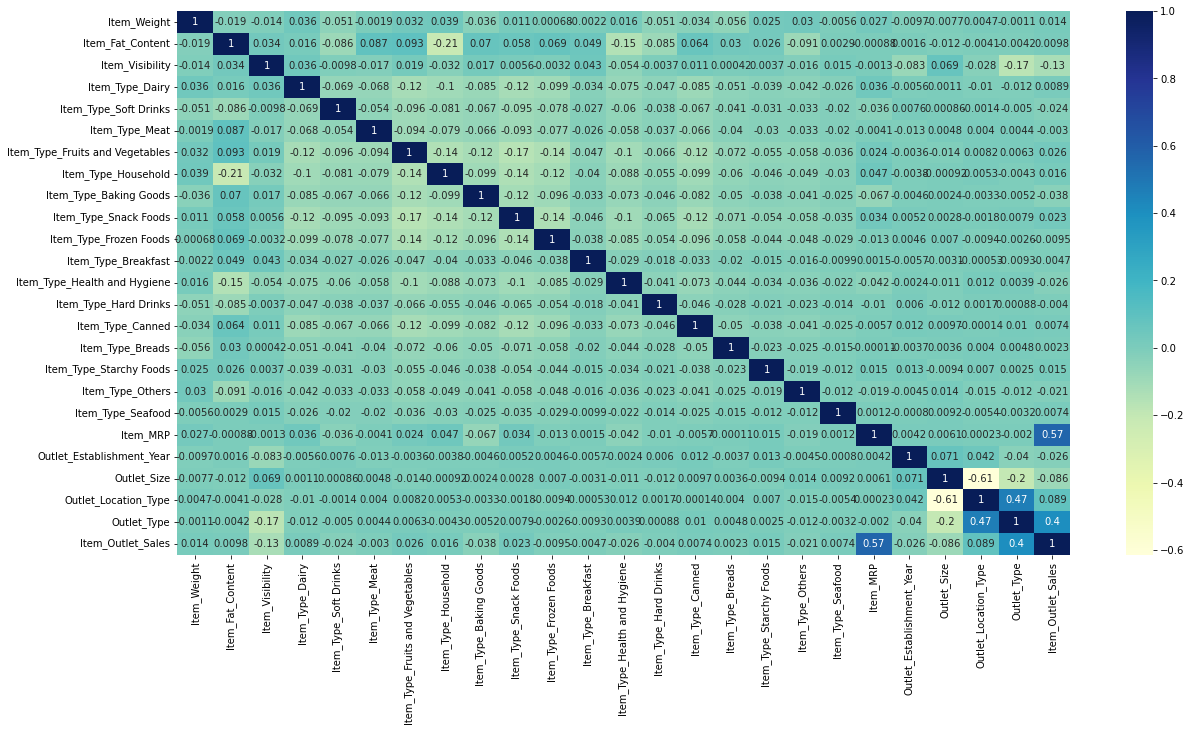

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
dataplot = sns.heatmap(Train_data.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

#### We will create barplot to see the relationship of  Item_Weight with Item_MRP

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


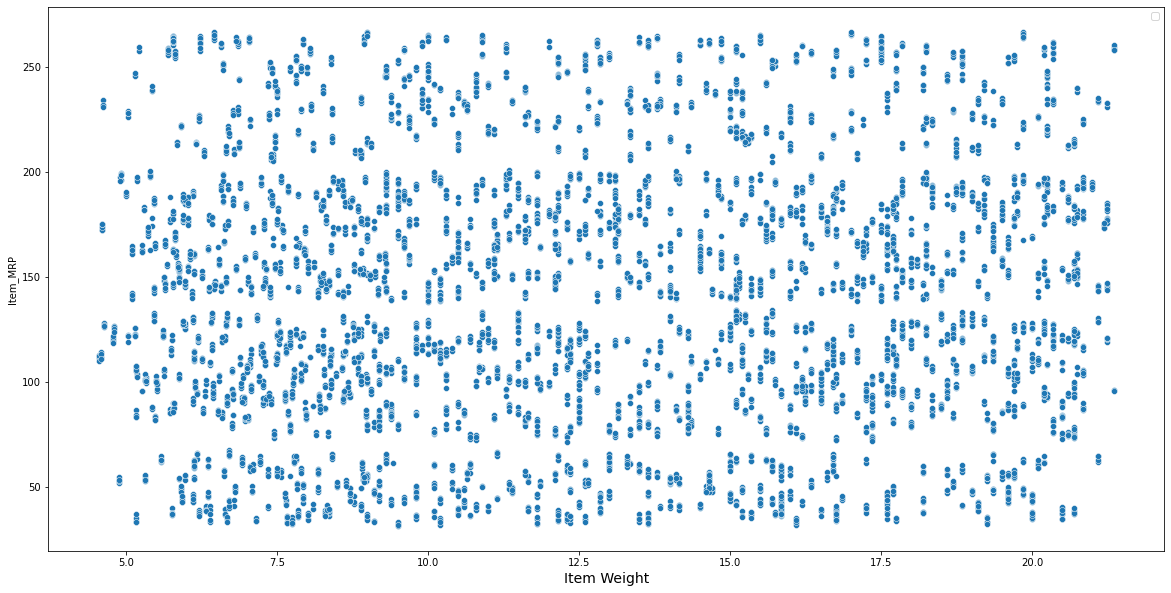

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot("Item_Weight", "Item_MRP", data=Train_data)
plt.xlabel("Item Weight", fontsize=14)
plt.ylabel("Item MRP", fontsize=14)
plt.legend()
plt.show()

#### We will apply Random forest regressor to predict the values for item_weight

In [68]:
rf = RandomForestRegressor()
testdf = Train_data[Train_data['Item_Weight'].isnull()==True]
traindf = Train_data[Train_data['Item_Weight'].isnull()==False]
y = traindf['Item_Weight']
x = traindf[['Item_Fat_Content','Item_MRP']]
rf.fit(x,y)
testdf=testdf[['Item_Fat_Content','Item_MRP']]
pred = rf.predict(testdf)

In [69]:
a=0
for i in range(8523):
    if Train_data.isnull()["Item_Weight"][i]==True:
        Train_data["Item_Weight"][i]=pred[a]
        a=a+1

C:\Users\DELL\AppData\Local\Temp\ipykernel_13700\1091126059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data["Item_Weight"][i]=pred[a]


In [70]:
testdf = Test_data[Test_data['Item_Weight'].isnull()==True]
traindf = Test_data[Test_data['Item_Weight'].isnull()==False]
y = traindf['Item_Weight']
x = traindf[['Item_Fat_Content','Item_MRP']]
rf.fit(x,y)
testdf=testdf[['Item_Fat_Content','Item_MRP']]
pred = rf.predict(testdf)

In [71]:
a=0
for i in range(5681):
    if Test_data.isnull()["Item_Weight"][i]==True:
        Test_data["Item_Weight"][i]=pred[a]
        a=a+1

C:\Users\DELL\AppData\Local\Temp\ipykernel_13700\3215332705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data["Item_Weight"][i]=pred[a]


In [72]:
Train_data.isnull().sum()

Item_Weight                        0
Item_Fat_Content                   0
Item_Visibility                    0
Item_Type_Dairy                    0
Item_Type_Soft Drinks              0
Item_Type_Meat                     0
Item_Type_Fruits and Vegetables    0
Item_Type_Household                0
Item_Type_Baking Goods             0
Item_Type_Snack Foods              0
Item_Type_Frozen Foods             0
Item_Type_Breakfast                0
Item_Type_Health and Hygiene       0
Item_Type_Hard Drinks              0
Item_Type_Canned                   0
Item_Type_Breads                   0
Item_Type_Starchy Foods            0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_MRP                           0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
dtype: int64

In [73]:
Test_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### We will check for Multicollinearity in our data using VIF values

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(Train_data.values,i) for i in range (Train_data.shape[1])]
vif['features']=Train_data.columns
print(vif)

         vif                         features
0   1.014125                      Item_Weight
1   1.135228                 Item_Fat_Content
2   1.069972                  Item_Visibility
3   4.059298                  Item_Type_Dairy
4   2.730103            Item_Type_Soft Drinks
5   2.929143                   Item_Type_Meat
6   6.580264  Item_Type_Fruits and Vegetables
7   4.743999              Item_Type_Household
8   3.775754           Item_Type_Baking Goods
9   6.366913            Item_Type_Snack Foods
10  4.771194           Item_Type_Frozen Foods
11  1.508635              Item_Type_Breakfast
12  3.020841     Item_Type_Health and Hygiene
13  1.803639            Item_Type_Hard Drinks
14  3.863331                 Item_Type_Canned
15  2.066776                 Item_Type_Breads
16  1.683448          Item_Type_Starchy Foods
17  1.672863                 Item_Type_Others
18  1.280262                Item_Type_Seafood
19  1.672213                         Item_MRP
20  1.037790        Outlet_Establi

#### We will now fit models in our dataset and see which model best fits our data

In [75]:
#Linear Regression
y1= Train_data[["Item_Outlet_Sales"]]
x1=Train_data.drop(["Item_Outlet_Sales"],axis=1)
lr = LinearRegression()
lr.fit(x1, y1)

LinearRegression()

In [76]:
Y_pred_lr=lr.predict(x1)
print(r2_score(y1, Y_pred_lr))
print(mean_absolute_error(y1, Y_pred_lr))
print(np.sqrt(mean_squared_error(y1, Y_pred_lr)))

0.5082309856639191
898.790319749357
1196.6338835100387


In [77]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf=rf.fit(x1,y1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13700\389992326.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=rf.fit(x1,y1)


In [78]:
Y_pred_rf=rf.predict(x1)
print(r2_score(y1, Y_pred_rf))
print(mean_absolute_error(y1, Y_pred_rf))
print(np.sqrt(mean_squared_error(y1, Y_pred_rf)))

0.9383018289868283
293.4276974217998
423.854560657666


#### Now plotting the actual values and predicted values we will get an estimate how close would be our predicted values

(0.0, 100.0)

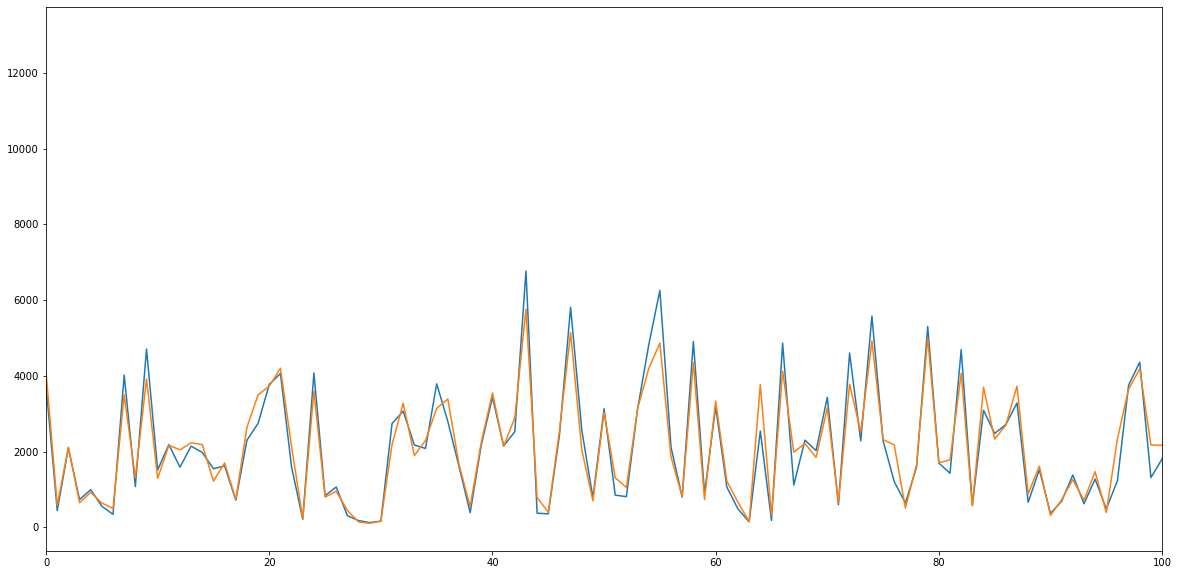

In [79]:
fig, ax = plt.subplots(figsize=(20,10))
plt.rcParams["figure.autolayout"] = True
plt.plot(y1)
plt.plot(Y_pred_rf)
plt.xlim(0,100)

#### Now we will split the data based pn the Item_type values into different columns. For eg. Item_Type_Dairy, Item_Type_Beverages etc. 

#### We will repeat steps we did above for all  dataset and fit our most appropriate model i.e Random Forset Regressor and predict the values of sales of Test_data.

In [82]:
label_encoder = LabelEncoder()
categorical_cols = ['Item_Fat_Content',"Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
for col in categorical_cols:
    Train_data1[col] = label_encoder.fit_transform(Train_data1[col])

In [84]:
rf = RandomForestRegressor()
testdf = Train_data1[Train_data1['Item_Weight'].isnull()==True]
traindf = Train_data1[Train_data1['Item_Weight'].isnull()==False]
y = traindf['Item_Weight']
x = traindf[['Item_Fat_Content','Item_MRP']]
rf.fit(x,y)
testdf=testdf[['Item_Fat_Content','Item_MRP']]
pred = rf.predict(testdf)

In [85]:
a=0
for i in range(8523):
    if Train_data1.isnull()["Item_Weight"][i]==True:
        Train_data1["Item_Weight"][i]=pred[a]
        a=a+1

C:\Users\DELL\AppData\Local\Temp\ipykernel_13700\3589266170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data1["Item_Weight"][i]=pred[a]


In [86]:
Train_data1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [87]:
Train_data2 = {}
for i in range(0,16): 
    Train_data2[i]=Train_data1[Train_data1['Item_Type'] == Train_data1["Item_Type"].unique()[i]]

In [88]:
Test_data2 = {}
for i in range(0,16): 
    Test_data2[i]=Test_data[Test_data['Item_Type'] == Test_data["Item_Type"].unique()[i]]

In [89]:
Test_data3=Test_data2

In [90]:
for i in range(0,16):
    Test_data3[i]=Test_data3[i].drop(["Item_Type"],axis=1)

In [91]:
Test_data2 = {}
for i in range(0,16): 
    Test_data2[i]=Test_data[Test_data['Item_Type'] == Test_data["Item_Type"].unique()[i]]

In [92]:
Train_data3=Train_data2

In [93]:
Y_pred_rf2 = []
Temp_Y_pred_rf2=[]
for i in range(0,16):
    y2= Train_data3[i][["Item_Outlet_Sales"]]
    x2= Train_data3[i].drop(["Item_Outlet_Sales"],axis=1)
    x2= x2.drop(["Item_Type"],axis=1)
    rf = RandomForestRegressor()
    rf=rf.fit(x2,y2)
    for j in range(0,16):
        if Test_data2[j]["Item_Type"].unique()[0] == Train_data2[i]["Item_Type"].unique()[0]:
            Temp_Y_pred_rf2=rf.predict(Test_data3[j])
            Y_pred_rf2.append(Temp_Y_pred_rf2)
            

C:\Users\DELL\AppData\Local\Temp\ipykernel_13700\329273494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=rf.fit(x2,y2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13700\329273494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=rf.fit(x2,y2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13700\329273494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=rf.fit(x2,y2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13700\329273494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=rf.fit(x2,y2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1

In [94]:
Test_data_Final=pd.read_csv("D:\Technocolabs\Mini-project-01 June 2023\Test.csv")
Test_data_Final.insert(11,"Sales", " ")

In [95]:
Test_data_Final

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,


In [96]:
for i in range(0,16):
    z=0
    for j in range(0,5681):
        if Train_data2[i]["Item_Type"].unique()[0] == Test_data_Final["Item_Type"][j]:
            Test_data_Final["Sales"][j]=Y_pred_rf2[i][z]
            z=z+1

C:\Users\DELL\AppData\Local\Temp\ipykernel_13700\2434915549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data_Final["Sales"][j]=Y_pred_rf2[i][z]


In [97]:
Test_data_Final["Sales"].isnull().sum()

0

#### We will get the final dataset for the our Test_data which inclues predicted sales

In [98]:
Test_data_Final

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1868.308038
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1165.609402
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,907.998066
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2364.349012
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,4372.035622
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2606.081018
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,3515.696978
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1998.738258
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,5343.684168


#### We will export the dataset into csv file named Test_data_Final.csv

In [99]:
df = pd.DataFrame(Test_data_Final)

df.to_csv(r'D:\Technocolabs\Mini-project-01 June 2023\Test_data_Final.csv', index=False, header=True)

In [118]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [119]:
tree_estimator = rf.estimators_[0]

In [120]:
plt.figure(figsize=(150, 100))
tree.plot_tree(tree_estimator, filled=True)
plt.show()